# Assignment 4: Probabilities and Statistics

OPIM 5894 Data Science with Python

Name:   NetID:

Discussed with: if any

## Instructions
-  Don't get panic if you find something not demonstrated in class. Your best friend Google is there for you.
-  When you are done, go to the Notebook Menu Cell -> Run All, to run the code from beginning to end. <br>
-  Save the notebook file as both lastname.ipynb and lastname.html.<br>

You are supposed to finish this assignment on your own. If you have to discuss with others, please mention who you have discussed with on each question. Honesty is highly appreciated, so there is no penalty for disclosing such information.

# 1. Basic Concepts

1.1 Practice the pronunciations of "homoscedasticity" (['hɔməusi,dæs'tisəti]) and "Heteroscedasticity" ([,hetərəuskədæs'tisəti]) until you can't forget.
<br> https://www.youtube.com/watch?v=1UO99rp2OkI
<br> https://www.youtube.com/watch?v=LCN_05CLeYA

1.2 What are the common measures to evaluate an estimator? Why statisticians and computer scientists often focus on different measures? 

- The most common ones are unbiasedness, consistency and efficiency
- Statisticians often focus on unbiasedness to make appropriate policy recommendations, whereas computer scientist focus on efficiency (variance) for better out-of-sample predictions

1.3 Why the simulation approach based on areas of circle vs. square can appropriate the value of Pi very well?

- In theory, the probability a randomly drawn point to fall in the circle is pi/4. The outcome of each point (inside or outside circle) is a random variable following binomial distribution with p=pi/4. Following the Law of large numbers, the empirical probability (i.e., the average outcome on all points) gets closer and closer to pi/4 as more points are simulated.

1.4 Interpret the meanings of p-value in two ways.

- Largest significance level to accept (or fail to reject) the null hypothesis
- Probability of observing a statistic greater than its empirical value when the null hypothesis is true

1.5 What are Type I and Type II errors?

- Type I: Falsely reject null
- Type II: Falsely accept null

1.6 In practice, you may often see "Adjusted R^2" while running linear regressions. Use Google to figure out what "Adjusted R^2" is. What is its advantage over "R^2"? No more than 150 words. Provide references if any.

- Adjusted R^2 accounts for the number of regressors in a model. Adjusted R^2 increases with the inclusion of one additional regressor only when the increment in R^2 exceeds one would see by chance.
https://en.wikipedia.org/wiki/Coefficient_of_determination

# 2. Distrubtions

2.1 Suppose we have three random variables following different distributions: X1~binomial(n=1,p=0.7), X2~normal(mu=0,sigma^2=2), X3~Poisson(lambda=1). Using simulation to visualize the distribution of Y=3*X1+X2+2*X3.

In [178]:
import numpy as np
np.random.seed(1000)
size = 10000
X1 = np.random.binomial(n=1, p=0.7, size=size)
X2 = np.random.normal(loc=0, scale=np.sqrt(2), size=size)
X3 = np.random.poisson(lam=1, size=size)
Y = 3*X1+X2+2*X3

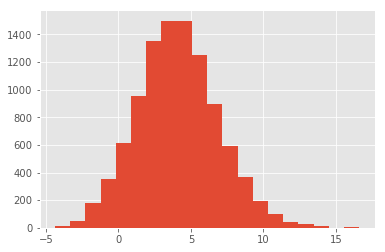

In [168]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 
plt.hist(Y, bins=20)
plt.show()

2.2 What is the approximate probability of Pr(Y<10)?

In [169]:
np.mean(Y<10)

0.97699999999999998

2.3 Compute Skewness and Kurtosis and Y. Is this distribution left or right skewed? Does Y has a fatter tail than a standard normal?

In [170]:
import scipy.stats
# Right skewed if skewness>0 and fatter tail than standard normal if kutosis>0 
# note that by default, kurtosis is normalized to zero
# returns 3 for standard normal if call scipy.stats.kurtosis(x, fisher=False)
[scipy.stats.skew(Y), scipy.stats.kurtosis(Y)]

[0.2392053970985122, 0.18477987777346572]

# 2. Confidence Interval, Bootstrap and t-test

In [171]:
import pandas as pd
import numpy as np
np.random.seed(987)
df = pd.DataFrame({'x1':np.random.normal(loc=0.1, scale=1, size=1000), 
                   'x2':np.random.normal(loc=0.2, scale=1.5, size=1000)})
df.to_csv('x1_x2.csv', index=False)

Load the dataset x1_x2.csv to memory. x1 and x2 are drawn independently from two unknown distributions. Now answer the following questions.

2.1 Following Central Limit Theorem, the means of x1 and x2 are approprixmately normally distributed. Based on this fact, construct the 95% confidence intervals for the means of x1 and x2.

In [172]:
def CI(x):
    m = np.mean(x)
    se = np.std(x, ddof=1)/np.sqrt(len(x))
    thd = scipy.stats.norm.ppf(0.975)
    return (m - thd*se, m + thd*se)
    

print(CI(df.x1), CI(df.x2))

(-0.00074318550594953958, 0.12723639929328467) (0.091188410035577858, 0.27910686439671173)


2.2 Use Bootstrap to construct the 95% confidence intervals for the means of x1 and x2. Unlike the above approach which assumes that the mean follows a normal distribution, bootstrap is a non-parametric way to construct confidence interval as it does not rely on any parametric assumption. The detailed steps for getting the confidence interval of the mean of an array y are as follows.
1. Randomly sample N (N=len(y)) points with replacement from y. Note that some points might be sampled more than once, whereas some others not sampled at all. Denote the resulting sample as Y1.
2. Compute the mean of Y1
3. Repeat 1 and 2 for 1000 times. Now you have samples Y1, Y2, ..Y1000 and their means: [mean(Y1), mean(Y2), ..., mean(Y1000)] 
4. Use the 2.5% and 97.5% percentiles of the 1000 means as the lower and upper bounds, respectively, for the 95% confidence interval of the mean of y.

In [173]:
from sklearn.utils import resample

In [174]:
boot = [np.mean(resample(df.x1)) for i in range(1000)]
(np.percentile(boot, 2.5), np.percentile(boot, 97.5))

(0.0056577015973324225, 0.12693819004704279)

In [175]:
boot2 = [np.mean(resample(df.x2)) for i in range(1000)]
(np.percentile(boot2, 2.5), np.percentile(boot2, 97.5))

(0.092520971160382035, 0.2738148982435416)

2.3 Use two-sided t-test to test whether the means of x1 and x2 are identical. Would you accept the null hypothesis that they are identical at 5% significance level?<br>
See https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ttest_ind.html

In [176]:
# No. The means are NOT identical according to t-test. The p-value is less than 0.05. Note that overlap in CI doesn't mean that x1 and x2 are not significant
scipy.stats.ttest_ind(df.x1, df.x2)

Ttest_indResult(statistic=-2.1017124298611036, pvalue=0.035703388432142776)

# 3. Regression Diagnostics in Python

Now that you asked why we didn't examine the diagnostics of linear regression in Python, I found some Python code to generate similar plots as in R below. <br><br>
3.1 Use this demo code to analyze the impact of educ on wage after controlling for exper, using the wage2.csv dataset. I have provided notes where minor changes are needed.

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     33.57
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           2.48e-13
Time:                        01:10:50   Log-Likelihood:                -150.45
No. Observations:                 207   AIC:                             306.9
Df Residuals:                     204   BIC:                             316.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0354      0.211      0.168      0.8

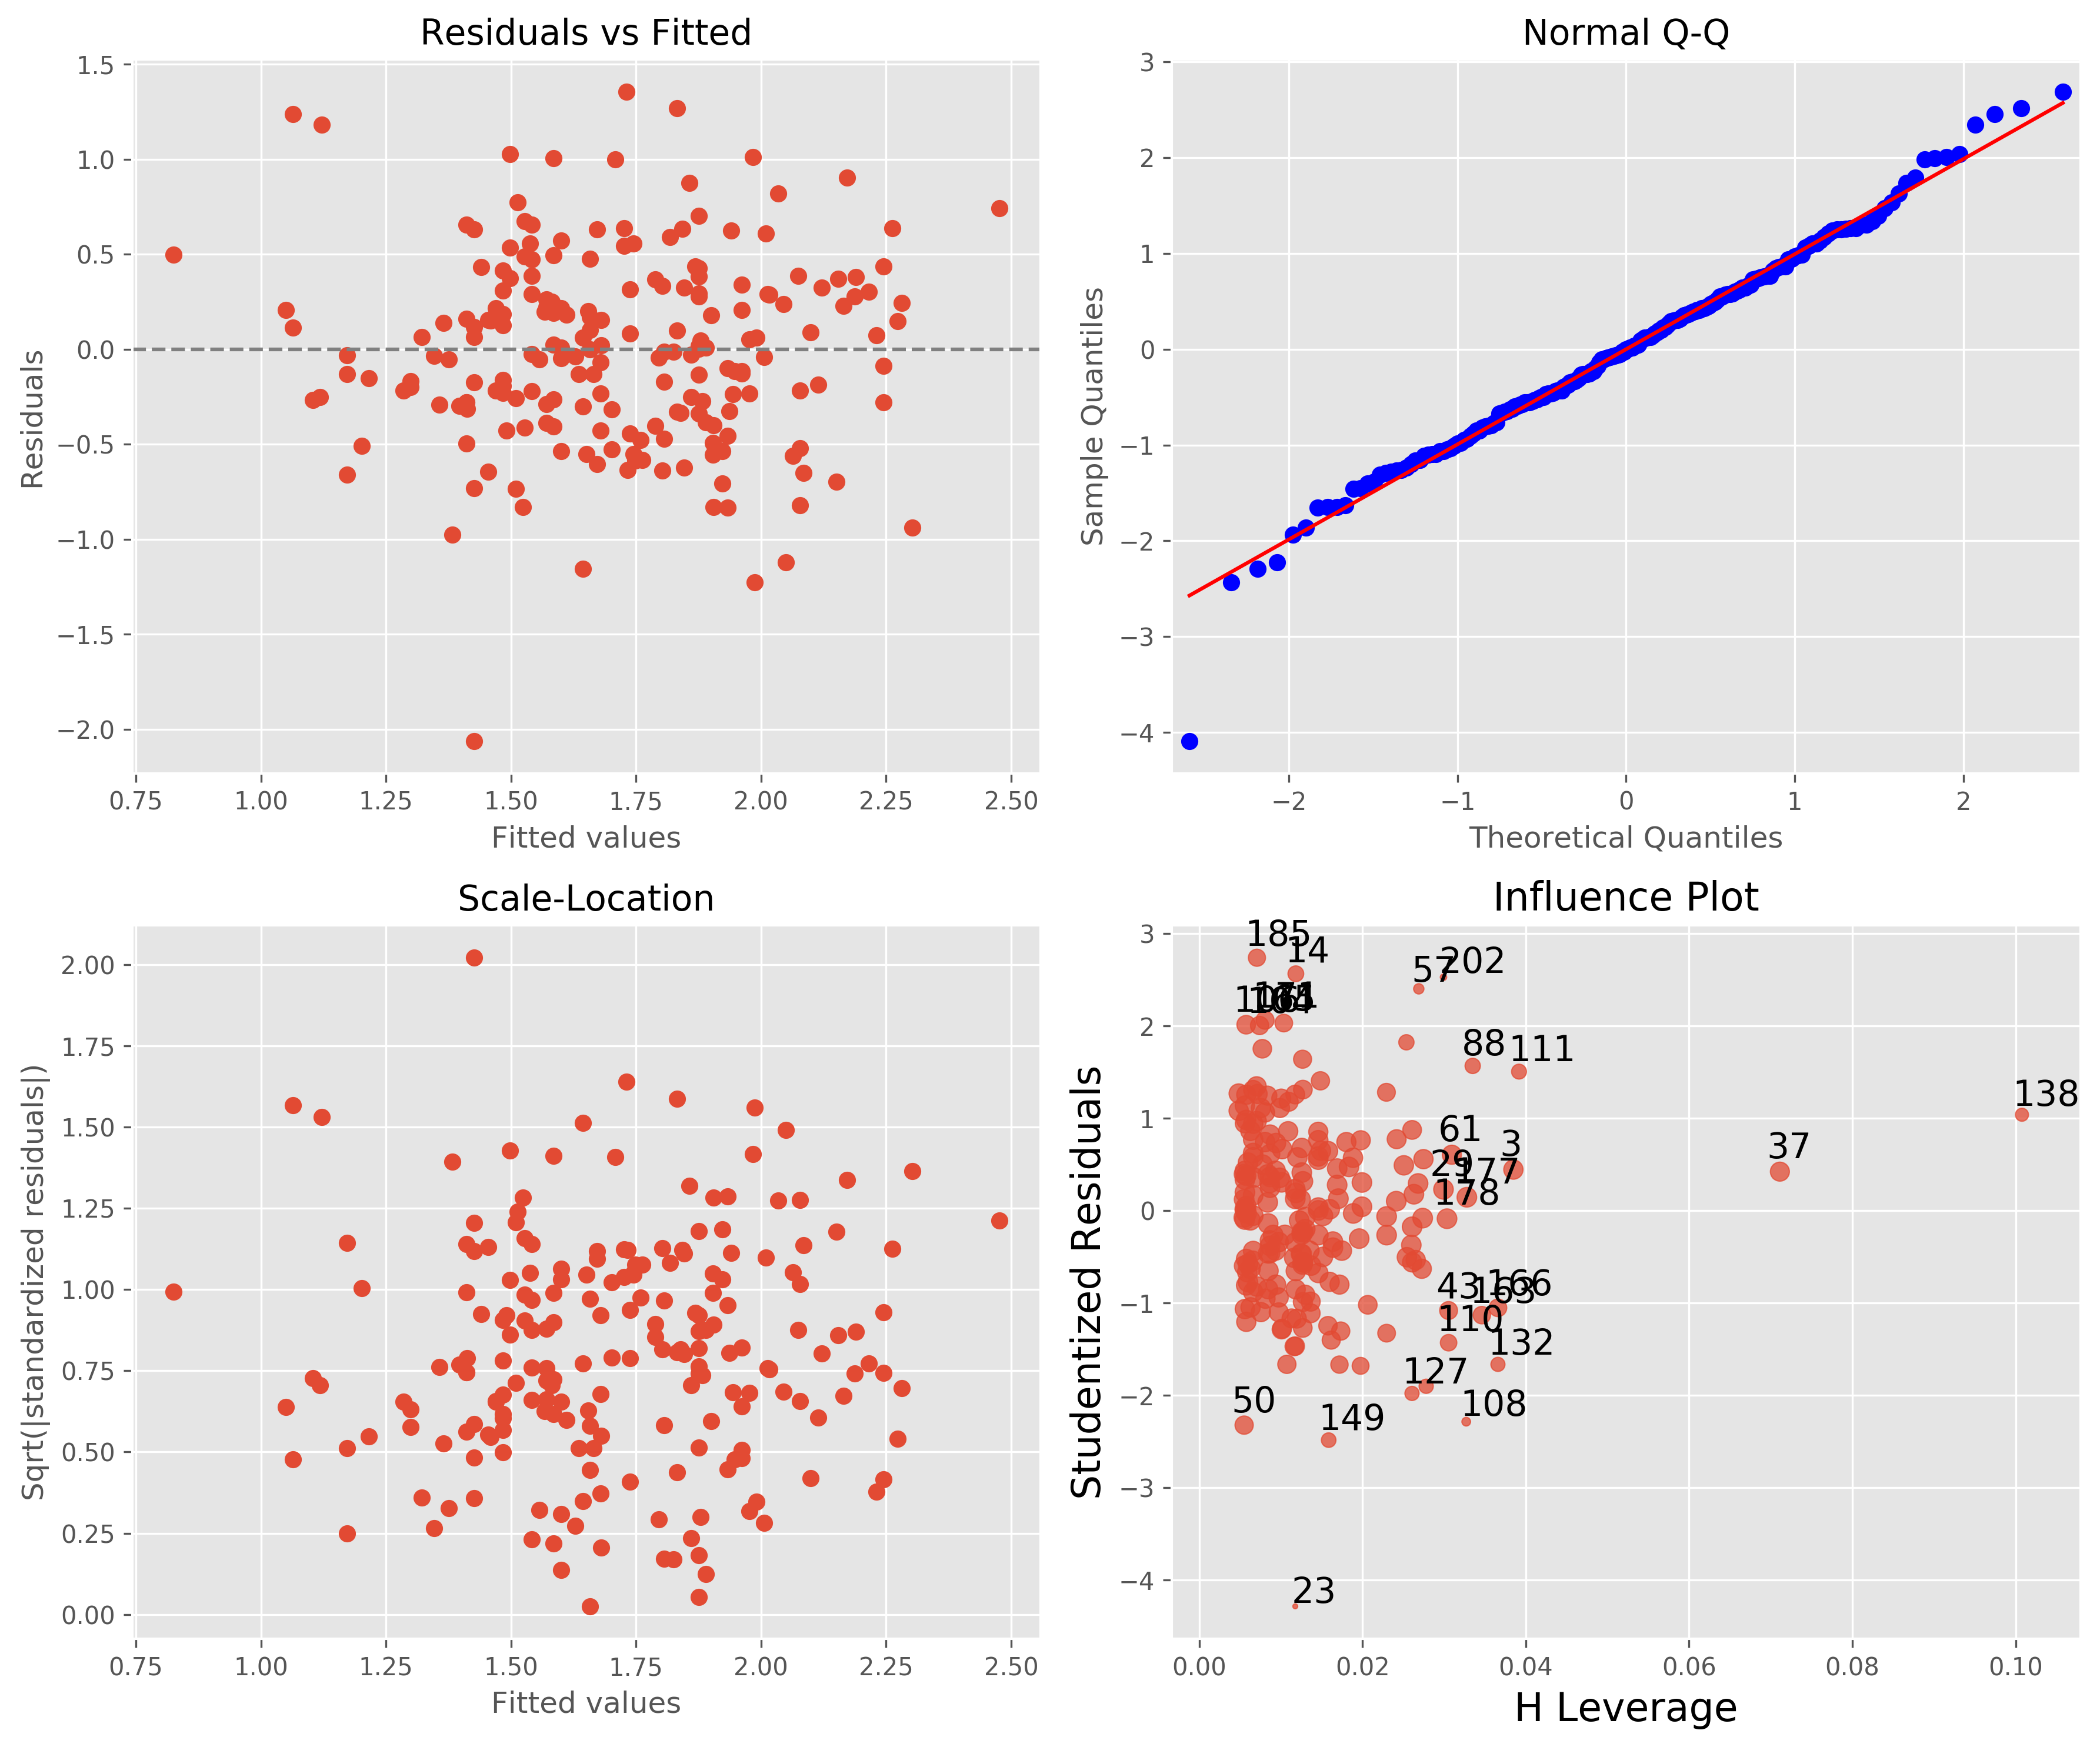

In [177]:
# import modules
# https://github.com/OpenNewsLabs/one-regression-six-ways/blob/master/Python/statsmodels_method.py
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# *** Change the data and variable names as needed ***
# set working directory - modify as necessary
os.chdir('D:/Dropbox/Teaching/Data Science using Python/Notebooks')

# read data
d = pd.read_csv('wage2.csv')

# run regression
lm = smf.ols(formula = 'lwage ~ educ+exper', data = d).fit()
print(lm.summary())

# **** assess the regression model, no need to change anything below ****

## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({'resids': lm.resid,
                        'std_resids': lm.resid_pearson,
                        'fitted': lm.predict()})

print(results.head())

fig = plt.figure(figsize = (12, 10), dpi = 300)

## raw residuals vs. fitted
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

## q-q plot
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

## scale-location
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

## residuals vs. leverage
ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()
fig.savefig('regplots.png')

3.2 How well do the linearity, constant variance, and normality assumptions hold?

Linearity (residual-fitted plot): not good. Costant variance (scale-location plot): barely; normality (QQ plot): poorly <br>
Note: looking at regression results and p-values cannot access these assumptions

3.3 Rerun the regression using the log version of wage (i.e. lwage) instead. How well do the linearity, constant variance, and normality assumptions hold?

Linearity: good. Costant variance: okay; normality: good

3.4 How to interpret the coefficients of educ in regressions wage~educ+exper vs. lwage~educ+exper?

wage: one unit increase in educ results in beta(educ) unit increase in wage <br>
lwage: one unit increase in educ results in beta(educ) unit increase in log(wage). An alternative, and more widely used, interepreation is that one unit increase in educ results in beta(educ) percentage increase in wage.